# Analyze Stock Prices
The goal of this notebook is to analyze prices of stocks, which we will accomplish by extracting stock prices from an online source, such as Yahoo Finance or MorningStar, and analyze and visualise it.

We will try to address the following specific questions:

  * How to download/extract prices from an online source?
  * Historic change of a Stock's price over time?
  * Calculate the daily return average of a stock.
  * What was the correlation between daily returns of different stocks?
  * Use Regression/ML models to predict future stock prices.

In [3]:
#Import libraries
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas_datareader.data as web
from datetime import datetime
from __future__ import division

We will first create a list of stocks that we are interested in analyzing in this study. In `stocks` variable store the stock ticker. We will set the periof of analysis using `start` and `end` variables. Then using `DataReader` we will read historic open, close, high, and low prices.

In [6]:
# Create a list of stocks to analyze
stocks = ['HASI','PEGI','CAFD','BEP','CVA']

# Lets set today's date as the time up to which the analysis has to be carried out
end = datetime.now()

# Set the historic analysis period in years (yrs = 1), and initialize the start date
yrs = 1
start = datetime(end.year-yrs,end.month,end.day) 

#Using Yahoo Finance/MorningStar to grab the stock data
for stock in stocks:
    globals()[stock] = web.DataReader(stock,'morningstar',start,end) #The globals method sets the stock name to a global variable

The advantage of using the `globals()` method ensures that each stock-ticker is stored as a variable and is available across this notebook and within any local functions. We then call `head()` and `describe()` to inspect the stock prices stored in the dataframe. The `head()` method shows the top five records in the dataframe (think about `tail()` method). The `describe()` method on the other hand shows the summary statistics of each column (high, low, open, close, volume etc.) of the dataframe.

In [10]:
HASI.tail()

Close    High    Low   Open  Volume
Symbol Date                                           
HASI   2018-03-19  18.56  18.950  18.28  18.94  258278
       2018-03-20  18.61  18.739  18.43  18.56  391662
       2018-03-21  18.78  18.900  18.52  18.66  220597
       2018-03-22  18.80  19.130  18.70  18.70  309696
       2018-03-23  18.83  18.970  18.78  18.83  339865

In [11]:
HASI.describe()

,Close,High,Low,Open,Volume
count,260.000000,260.000000,260.000000,260.000000,2.600000e+02
mean,22.490654,22.705220,22.291390,22.501769,3.296488e+05
std,1.708258,1.695137,1.724651,1.710681,2.550090e+05
min,17.600000,17.900000,17.330000,17.590000,0.000000e+00
25%,21.790000,21.962500,21.606750,21.767500,2.035448e+05
50%,23.010000,23.160000,22.830000,23.030000,2.713390e+05
75%,23.770000,24.045000,23.512500,23.762500,3.877515e+05
max,25.220000,25.280000,24.800000,25.220000,2.858697e+06


# Historic performance of a stock

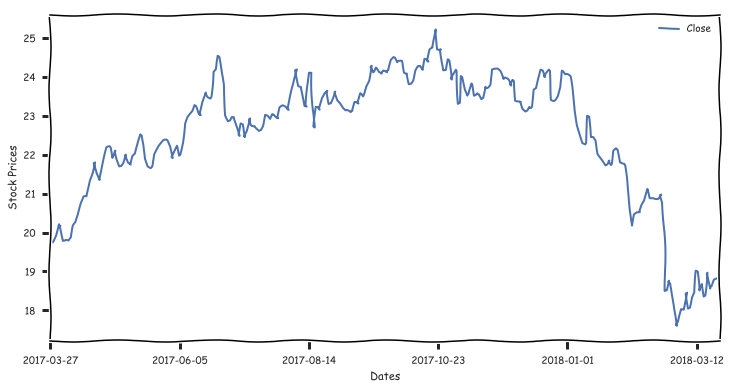

In [54]:
#Plotting the stock's closing price
plt.figure(figsize=(12,6))
plt.xkcd()
fig = HASI['Close'].plot(legend=True)
labels = [item.get_text()[7:17] for item in fig.get_xticklabels()]
fig.set_xticklabels(labels)
plt.xlabel('Dates')
plt.ylabel('Stock Prices')
plt.show()


In [52]:
mv_avg = [7,15,30,60] #days

for mv in mv_avg:
    column_nm = "MA of %s days" %(str(mv))
    HASI[column_nm] = HASI['Close'].rolling(window=mv,center=False).mean()

HASI.head()

Close   High    Low   Open  Volume  MA of 7 days  \
Symbol Date                                                           
HASI   2017-03-27  19.82  19.93  19.39  19.40  629175           NaN   
       2017-03-28  19.75  20.00  19.60  19.85  529918           NaN   
       2017-03-29  19.92  20.03  19.75  19.78  329225           NaN   
       2017-03-30  20.22  20.30  19.93  20.05  430212           NaN   
       2017-03-31  20.20  20.29  20.14  20.23  644570           NaN   

                   MA of 15 days  MA of 30 days  MA of 60 days  
Symbol Date                                                     
HASI   2017-03-27            NaN            NaN            NaN  
       2017-03-28            NaN            NaN            NaN  
       2017-03-29            NaN            NaN            NaN  
       2017-03-30            NaN            NaN            NaN  
       2017-03-31            NaN            NaN            NaN

In [51]:
HASI.tail()

Close    High    Low   Open  Volume  MA of 7 days  \
Symbol Date                                                            
HASI   2018-03-19  18.56  18.950  18.28  18.94  258278     18.651429   
       2018-03-20  18.61  18.739  18.43  18.56  391662     18.672857   
       2018-03-21  18.78  18.900  18.52  18.66  220597     18.638571   
       2018-03-22  18.80  19.130  18.70  18.70  309696     18.680000   
       2018-03-23  18.83  18.970  18.78  18.83  339865     18.701429   

                   MA of 15 days  MA of 30 days  MA of 60 days  
Symbol Date                                                     
HASI   2018-03-19      18.319333      19.339000      20.896000  
       2018-03-20      18.357333      19.277333      20.814167  
       2018-03-21      18.436000      19.220000      20.731500  
       2018-03-22      18.509333      19.163333      20.642167  
       2018-03-23      18.562667      19.101000      20.555000

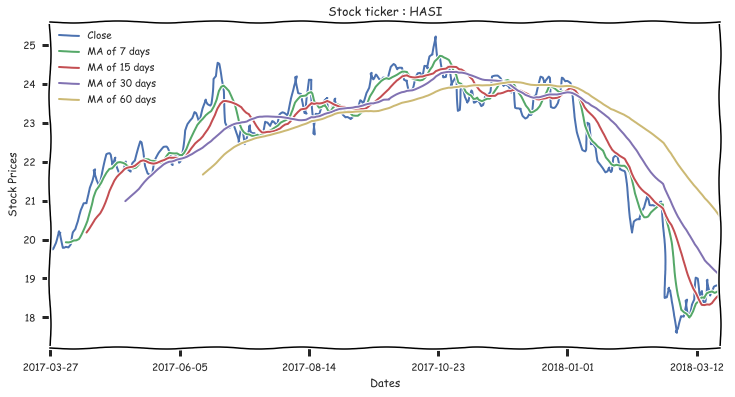

In [58]:
#plt.figure()
#plt.xkcd()
fig = HASI[['Close','MA of 7 days','MA of 15 days','MA of 30 days','MA of 60 days']].plot(subplots=False,figsize=(12,6))
labels = [item.get_text()[7:17] for item in fig.get_xticklabels()]
fig.set_xticklabels(labels)
plt.xlabel('Dates')
plt.ylabel('Stock Prices')
plt.title('Stock ticker : HASI')
plt.show()